# Library

In [1]:
from Module.Global_variable import os, time, torch, np, pd, plt
from Module.utils.Convenience_Function import save_pickle, time_checker
import Module.process1.preparatory_items as p1pi
from Module.process1.index_dictionary_maker import get_index_dictionary
from Module.process1.pipeLine import model_pipeline

# Global Variable

In [2]:
# Process 시작 전 정의 사항
#####################################################################################
_MAKE_NEW_DIRECTORY = False    # directory 생성
_MAKE_NEW_INDEX_DICT = False   # Index dictionary를 새로 생성할 것인지
# Log를 출력할 것인지
_VERBOSE = True
# Train 중 log를 저장할 것인지
_SAVE_TRAIN_LOG = True
# Time iteration log를 저장할 것인지
_SAVE_ITER_LOG = True
# 사용할 GPU 번호
_GPU_NUMBER = 3
torch.cuda.set_device(_GPU_NUMBER)   # set basic gpu
# torch._dynamo 캐시 한계치 조정
torch._dynamo.config.cache_size_limit = 64   # Default
# 모델 저장 여부
_MODEL_SAVE_BOOL = True
#####################################################################################


# 학습 간 전역 변수 설정
#####################################################################################
# process 기초 디렉터리 생성
p1pi.make_process_start_dir(makes_new=_MAKE_NEW_DIRECTORY)
# index dictionary with Data Loader
_IDX_DICT = get_index_dictionary(process_boolean=_MAKE_NEW_INDEX_DICT).process()
#####################################################################################


# Model 학습 관련 변수 설정
#####################################################################################
_PROCESS_SET_DICT = p1pi.get_process_set_dict(
    model_save=_MODEL_SAVE_BOOL,        # 모델 저장 여부
    save_iter_time_log=_SAVE_ITER_LOG,  # iteration의 time log 저장 여부
    save_train_log=_SAVE_TRAIN_LOG,     # 학습 과정에사 발생하는 주요 issue의 저장 여부
    verbose=_VERBOSE
)
_MODEL_SET_DICT = p1pi.get_model_set_dict(
    model_key="retinaNet",
    cnn_key="resnet50_v2",
    optimizer_key="SGD"
)
_HYPER_PARAMS_DICT = p1pi.get_HP_set_dict(
    learing_rate=0.0001, weight_decay=0.005,
    T_0=20, T_mult=2, eta_min=0.00000001,
    CS_threshold=0.5,   # 모델의 추론 결과에 대하여 Confidence socre의 threshold
    iou_threshold=0.3   # NMS에 적용될 IoU의 threshold
)
#####################################################################################

# Function

# Process

In [3]:
for k in range(_PROCESS_SET_DICT["k_size"]):
    
    # Model 학습을 위한 Instance 생성
    MTnE_Ob = model_pipeline(
        p_set_dict=_PROCESS_SET_DICT, m_set_dict=_MODEL_SET_DICT, hp_dict=_HYPER_PARAMS_DICT,
        idx_dict=_IDX_DICT, gpu_num=_GPU_NUMBER
    )
    # DataLoader와 predict에 사용될 idx_dict(pred_idx_dict)를 정의한다.
    MTnE_Ob.define_k_Loader_and_idx_dict(k)
    # Model 정의
    MTnE_Ob.import_model()
    # Optimizer(Scheduler, Scaler) 정의
    MTnE_Ob.import_optimizer_and_scheduler()
    # 주요 Instance 생성
    MTnE_Ob.make_important_Instance(k)
    
    MTnE_Ob.Iter_log_Ins.make_log_file()      # 해당 Dataset에 대한 신규 Log file 생성
    MTnE_Ob.make_train_log_path_and_file(k)   # 해당 train에 대한 train_log의 경로 및 파일 생성
    MTnE_Ob.make_model_save_path(k)           # model 저장 경로 생성
    
    # 모델의 학습 및 추론 실시.
    loss_dict, score_dict, predict_dict = MTnE_Ob.model_train_and_evaluate()
    
    break

Epochs:  1/200 [train][=============================================================] (1114/1114) [time] 0:14:46.33 total loss: 0.6130 [Loss ]  | classification 0.4520 | bbox_regression 0.1610
Epochs:  1/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:56.91 total loss: 0.3535 [Score]  | AP(AP@[.50:.05:.95]) 0.0026 | AP50 0.0124 | AP75 0.0003 | precision 0.3463 | recall 0.0455 | f1_score 0.0804
save check point: [before]: inf / [now]: 0.353483 - Saving model...
Epochs:  2/200 [train][=============================================================] (1114/1114) [time] 0:15:07.83 total loss: 0.4117 [Loss ]  | classification 0.2626 | bbox_regression 0.1491
Epochs:  2/200 [valid][=============================================================] ( 125/ 125) [time] 0:02:06.10 total loss: 0.2879 [Score]  | AP(AP@[.50:.05:.95]) 0.0318 | AP50 0.0730 | AP75 0.0273 | precision 0.6466 | recall 0.1042 | f1_score 0.1794
save check point: [before]: 0.353483

Epochs: 17/200 [train][=============================================================] (1114/1114) [time] 0:11:00.14 total loss: 0.2119 [Loss ]  | classification 0.1034 | bbox_regression 0.1085
Epochs: 17/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:30.22 total loss: 0.1439 [Score]  | AP(AP@[.50:.05:.95]) 0.2412 | AP50 0.3958 | AP75 0.2584 | precision 0.8999 | recall 0.4078 | f1_score 0.5613
save check point: [before]: 0.144704 / [now]: 0.143883 - Saving model...
Epochs: 18/200 [train][=============================================================] (1114/1114) [time] 0:11:39.84 total loss: 0.2135 [Loss ]  | classification 0.1051 | bbox_regression 0.1084
Epochs: 18/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:31.01 total loss: 0.1444 [Score]  | AP(AP@[.50:.05:.95]) 0.2365 | AP50 0.3843 | AP75 0.2570 | precision 0.9039 | recall 0.3950 | f1_score 0.5498
Epochs: 19/200 [train][========

Epochs: 33/200 [train][=============================================================] (1114/1114) [time] 0:11:04.25 total loss: 0.1718 [Loss ]  | classification 0.0758 | bbox_regression 0.0959
Epochs: 33/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:33.76 total loss: 0.1149 [Score]  | AP(AP@[.50:.05:.95]) 0.3618 | AP50 0.5771 | AP75 0.4035 | precision 0.9267 | recall 0.5856 | f1_score 0.7177
save check point: [before]: 0.116125 / [now]: 0.114898 - Saving model...
Epochs: 34/200 [train][=============================================================] (1114/1114) [time] 0:11:36.23 total loss: 0.1713 [Loss ]  | classification 0.0756 | bbox_regression 0.0957
Epochs: 34/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:31.86 total loss: 0.1148 [Score]  | AP(AP@[.50:.05:.95]) 0.3620 | AP50 0.5771 | AP75 0.4061 | precision 0.9258 | recall 0.5856 | f1_score 0.7175
save check point: [before]: 0.1

Epochs: 49/200 [train][=============================================================] (1114/1114) [time] 0:10:39.68 total loss: 0.1519 [Loss ]  | classification 0.0629 | bbox_regression 0.0890
Epochs: 49/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:35.04 total loss: 0.1005 [Score]  | AP(AP@[.50:.05:.95]) 0.4216 | AP50 0.6476 | AP75 0.4865 | precision 0.9512 | recall 0.6534 | f1_score 0.7747
Epochs: 50/200 [train][=============================================================] (1114/1114) [time] 0:11:44.91 total loss: 0.1489 [Loss ]  | classification 0.0602 | bbox_regression 0.0887
Epochs: 50/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:34.11 total loss: 0.0988 [Score]  | AP(AP@[.50:.05:.95]) 0.4504 | AP50 0.6978 | AP75 0.5216 | precision 0.9482 | recall 0.7044 | f1_score 0.8083
save check point: [before]: 0.099444 / [now]: 0.098769 - Saving model...
Epochs: 51/200 [train][========

Epochs: 65/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:16.64 total loss: 0.0945 [Score]  | AP(AP@[.50:.05:.95]) 0.4661 | AP50 0.7125 | AP75 0.5435 | precision 0.9569 | recall 0.7189 | f1_score 0.8210
save check point: [before]: 0.094674 / [now]: 0.094543 - Saving model...
Epochs: 66/200 [train][=============================================================] (1114/1114) [time] 0:07:02.31 total loss: 0.1390 [Loss ]  | classification 0.0528 | bbox_regression 0.0862
Epochs: 66/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:12.10 total loss: 0.0943 [Score]  | AP(AP@[.50:.05:.95]) 0.4665 | AP50 0.7137 | AP75 0.5424 | precision 0.9549 | recall 0.7206 | f1_score 0.8214
save check point: [before]: 0.094543 / [now]: 0.094259 - Saving model...
Epochs: 67/200 [train][=============================================================] (1114/1114) [time] 0:06:29.74 total loss: 0.1423 [Loss ]  | class

Epochs: 82/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:16.95 total loss: 0.0899 [Score]  | AP(AP@[.50:.05:.95]) 0.4882 | AP50 0.7442 | AP75 0.5670 | precision 0.9491 | recall 0.7507 | f1_score 0.8383
save check point: [before]: 0.090810 / [now]: 0.089853 - Saving model...
Epochs: 83/200 [train][=============================================================] (1114/1114) [time] 0:07:29.21 total loss: 0.1324 [Loss ]  | classification 0.0501 | bbox_regression 0.0824
Epochs: 83/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:15.50 total loss: 0.0896 [Score]  | AP(AP@[.50:.05:.95]) 0.4898 | AP50 0.7370 | AP75 0.5781 | precision 0.9527 | recall 0.7433 | f1_score 0.8351
save check point: [before]: 0.089853 / [now]: 0.089622 - Saving model...
Epochs: 84/200 [train][=============================================================] (1114/1114) [time] 0:07:00.51 total loss: 0.1353 [Loss ]  | class

Epochs: 99/200 [train][=============================================================] (1114/1114) [time] 0:06:40.48 total loss: 0.1292 [Loss ]  | classification 0.0473 | bbox_regression 0.0819
Epochs: 99/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:11.34 total loss: 0.0849 [Score]  | AP(AP@[.50:.05:.95]) 0.5054 | AP50 0.7425 | AP75 0.6028 | precision 0.9550 | recall 0.7482 | f1_score 0.8390
Epochs:100/200 [train][=============================================================] (1114/1114) [time] 0:06:42.50 total loss: 0.1280 [Loss ]  | classification 0.0463 | bbox_regression 0.0816
Epochs:100/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:12.32 total loss: 0.0841 [Score]  | AP(AP@[.50:.05:.95]) 0.5140 | AP50 0.7572 | AP75 0.6073 | precision 0.9539 | recall 0.7630 | f1_score 0.8479
save check point: [before]: 0.084336 / [now]: 0.084056 - Saving model...
Epochs:101/200 [train][========

Epochs:116/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:11.86 total loss: 0.0815 [Score]  | AP(AP@[.50:.05:.95]) 0.5294 | AP50 0.7777 | AP75 0.6321 | precision 0.9590 | recall 0.7836 | f1_score 0.8625
save check point: [before]: 0.081573 / [now]: 0.081483 - Saving model...
Epochs:117/200 [train][=============================================================] (1114/1114) [time] 0:06:46.62 total loss: 0.1209 [Loss ]  | classification 0.0423 | bbox_regression 0.0786
Epochs:117/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:11.70 total loss: 0.0820 [Score]  | AP(AP@[.50:.05:.95]) 0.5124 | AP50 0.7454 | AP75 0.6168 | precision 0.9593 | recall 0.7499 | f1_score 0.8417
Epochs:118/200 [train][=============================================================] (1114/1114) [time] 0:06:48.83 total loss: 0.1241 [Loss ]  | classification 0.0435 | bbox_regression 0.0805
Epochs:118/200 [valid][========

Epochs:134/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:16.98 total loss: 0.0809 [Score]  | AP(AP@[.50:.05:.95]) 0.5246 | AP50 0.7618 | AP75 0.6322 | precision 0.9595 | recall 0.7670 | f1_score 0.8525
save check point: [before]: 0.080938 / [now]: 0.080925 - Saving model...
Epochs:135/200 [train][=============================================================] (1114/1114) [time] 0:07:30.67 total loss: 0.1201 [Loss ]  | classification 0.0416 | bbox_regression 0.0785
Epochs:135/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:16.97 total loss: 0.0810 [Score]  | AP(AP@[.50:.05:.95]) 0.5215 | AP50 0.7563 | AP75 0.6293 | precision 0.9592 | recall 0.7614 | f1_score 0.8489
Epochs:136/200 [train][=============================================================] (1114/1114) [time] 0:07:18.88 total loss: 0.1207 [Loss ]  | classification 0.0423 | bbox_regression 0.0784
Epochs:136/200 [valid][========

Epochs:151/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:12.88 total loss: 0.0800 [Score]  | AP(AP@[.50:.05:.95]) 0.5361 | AP50 0.7829 | AP75 0.6417 | precision 0.9619 | recall 0.7886 | f1_score 0.8667
Epochs:152/200 [train][=============================================================] (1114/1114) [time] 0:07:47.55 total loss: 0.1164 [Loss ]  | classification 0.0395 | bbox_regression 0.0769
Epochs:152/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:12.57 total loss: 0.0797 [Score]  | AP(AP@[.50:.05:.95]) 0.5359 | AP50 0.7753 | AP75 0.6425 | precision 0.9602 | recall 0.7812 | f1_score 0.8615
Epochs:153/200 [train][=============================================================] (1114/1114) [time] 0:07:42.10 total loss: 0.1196 [Loss ]  | classification 0.0409 | bbox_regression 0.0788
Epochs:153/200 [valid][=============================================================] ( 125/ 125) [time]

Epochs:169/200 [train][=============================================================] (1114/1114) [time] 0:07:32.86 total loss: 0.1152 [Loss ]  | classification 0.0391 | bbox_regression 0.0762
Epochs:169/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:16.56 total loss: 0.0768 [Score]  | AP(AP@[.50:.05:.95]) 0.5536 | AP50 0.7980 | AP75 0.6657 | precision 0.9639 | recall 0.8045 | f1_score 0.8771
save check point: [before]: 0.077242 / [now]: 0.076830 - Saving model...
Epochs:170/200 [train][=============================================================] (1114/1114) [time] 0:07:31.03 total loss: 0.1124 [Loss ]  | classification 0.0370 | bbox_regression 0.0755
Epochs:170/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:17.16 total loss: 0.0778 [Score]  | AP(AP@[.50:.05:.95]) 0.5630 | AP50 0.8101 | AP75 0.6781 | precision 0.9657 | recall 0.8165 | f1_score 0.8849
Epochs:171/200 [train][========

Epochs:186/200 [train][=============================================================] (1114/1114) [time] 0:07:22.94 total loss: 0.1131 [Loss ]  | classification 0.0378 | bbox_regression 0.0753
Epochs:186/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:13.61 total loss: 0.0753 [Score]  | AP(AP@[.50:.05:.95]) 0.5548 | AP50 0.7908 | AP75 0.6676 | precision 0.9708 | recall 0.7956 | f1_score 0.8745
Epochs:187/200 [train][=============================================================] (1114/1114) [time] 0:07:24.06 total loss: 0.1119 [Loss ]  | classification 0.0365 | bbox_regression 0.0754
Epochs:187/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:15.23 total loss: 0.0747 [Score]  | AP(AP@[.50:.05:.95]) 0.5518 | AP50 0.7851 | AP75 0.6633 | precision 0.9672 | recall 0.7904 | f1_score 0.8699
save check point: [before]: 0.075194 / [now]: 0.074704 - Saving model...
Epochs:188/200 [train][========

# Result

In [4]:
score_dict['test']

{'AP(AP@[.50:.05:.95])': 0.6043278215716859,
 'AP50': 0.8563721967478874,
 'AP75': 0.7309462876308599,
 'precision': 0.9676840215439856,
 'recall': 0.8625971650663009,
 'f1_score': 0.9121237761392481}

In [5]:
from Module.process1.model_predict_checker import model_predict_checker

In [6]:
Check0_Ins = model_predict_checker(predict_dict=predict_dict, k=0, idx_dict=_IDX_DICT)
over_pred_df, under_pred_df, diff_pred_df, good_id_df = Check0_Ins.make_basic_value()

1. 추론에 사용된 전체 이미지의 갯수: 2472
--------------------------------------------------------------------------------
1-1. GT를 가지고 있는 이미지의 갯수: 820(0.332)
1-2. GT를 가지고 있지 않은 이미지의 갯수: 1652(0.668)


2. 모델의 추론 능력
--------------------------------------------------------------------------------
2-1. 모델이 GT를 찾지 못한 경우: 3
2-2. 모델이 GT가 없는 대상을 과하게 찾은 경우: 0
2-3. 총 GT의 크기 = 4359
2-3. 모델이 찾지 못한 GT의 크기 = 465(0.107)
2-4. 모델이 과도하게 찾은 GT의 크기 = 8


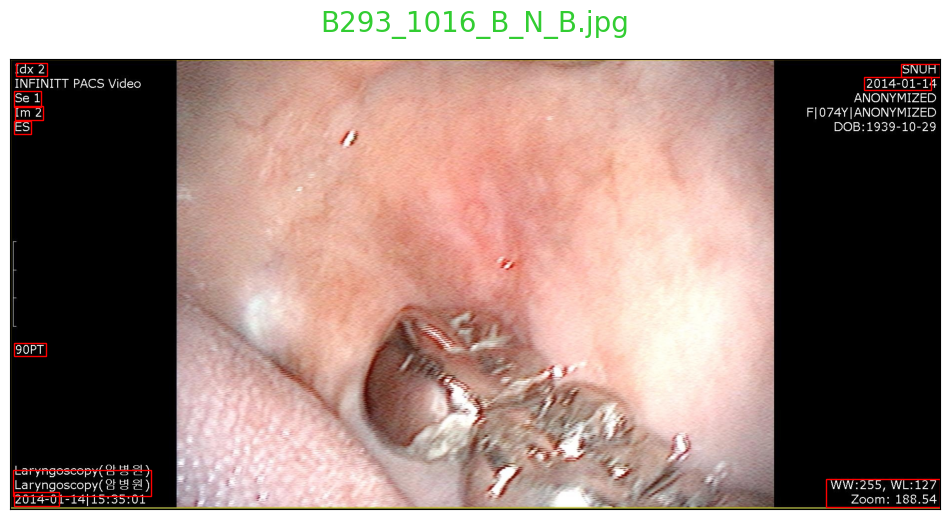

In [7]:
Check0_Ins.draw_predict_image(img_id=6874)